In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, (2, 3)]   # select petal length and petal width (most correlated features)
y = (iris.target == 0).astype(int)  # 1 if Iris-setosa, else 0 (binary classification)
#print(X,y)
#print("-------")
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train, X_test, y_train, y_test)
#print("-------")
# Feature scaling (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train, X_test)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (120, 2) Test shape: (30, 2)


In [11]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hypothesis function
def predict_prob(X, theta):
    return sigmoid(np.dot(X, theta))

# Cost function (Log Loss)
def compute_cost(X, y, theta):
    m = len(y)
    h = predict_prob(X, theta)
    epsilon = 1e-5  # avoid log(0)
    cost = -(1/m) * np.sum(y*np.log(h+epsilon) + (1-y)*np.log(1-h+epsilon))
    return cost


In [13]:
def gradient_descent(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)  # initialize weights
    
    cost_history = []
    
    for _ in range(epochs):
        h = predict_prob(X, theta)
        gradient = (1/m) * np.dot(X.T, (h - y))
        theta -= lr * gradient
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

# Add bias term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Train model
theta, cost_history = gradient_descent(X_train_b, y_train, lr=0.1, epochs=1000)

print("Learned parameters (theta):", theta)


Learned parameters (theta): [-2.59911057 -2.83038309 -2.41211409]


In [15]:
# Predict probabilities
y_pred_prob = predict_prob(X_test_b, theta)

# Convert to class labels using threshold 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print("Test Accuracy:", accuracy)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)


Test Accuracy: 1.0
Confusion Matrix:
 [[20  0]
 [ 0 10]]
Precision: 1.0
Recall: 1.0


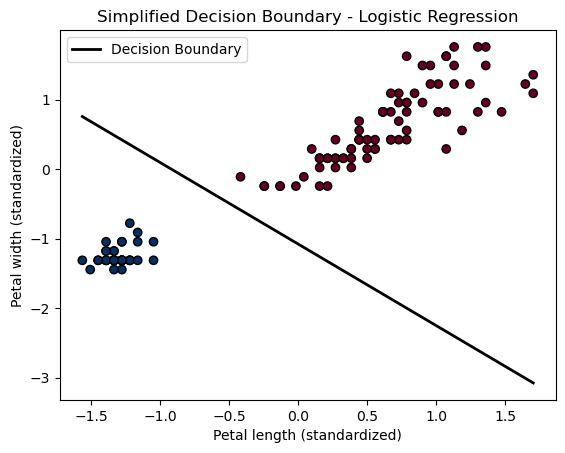

In [19]:
# Simplified Decision Boundary

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="RdBu", edgecolor="k")

# Decision boundary line: theta0 + theta1*x1 + theta2*x2 = 0
x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_values = -(theta[0] + theta[1]*x_values) / theta[2]

plt.plot(x_values, y_values, color="black", linewidth=2, label="Decision Boundary")
plt.xlabel("Petal length (standardized)")
plt.ylabel("Petal width (standardized)")
plt.title("Simplified Decision Boundary - Logistic Regression")
plt.legend()
plt.show()
